In [1]:
import math

import matplotlib as mpl
from matplotlib import cm
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns
import copy

import matplotlib.pyplot as plt
from matplotlib import rc

from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '18'
plt.rcParams['ytick.labelsize'] = '18'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999
pd.options.display.max_columns = None
cmap = cm.get_cmap('RdBu')

In [2]:
# We stored our runtime measurements in this file
data = pd.read_csv("runtime.csv")

# Figure 14

In [3]:
data

,Data,SGMRD-mine,SGMRD-search,LOF,StreamHiCS-mine,StreamHiCS-search,RS-Stream,xStream
0,Activity,168964,130020800,42120,51304,9027592,2276,85284
1,KddCup99,113946,111222100,16096,21514,1252780,1949,56573
2,Synth10,14244,9193258,6757,7091,208777,446,40706
3,Synth20,34415,18061610,13676,15996,853551,599,29585
4,Synth50,111520,49927900,28246,41112,5096376,1036,36273


In [4]:
d = data.set_index("Data")
d = d.stack().reset_index()
d.columns = [0,1,2]
data = d

In [5]:
data[2] = data[2]  / 1000 # put in seconds 

In [6]:
data[1].unique()

array(['SGMRD-mine', 'SGMRD-search', 'LOF', 'StreamHiCS-mine',
       'StreamHiCS-search', 'RS-Stream', 'xStream'], dtype=object)

In [7]:
data[0].unique()

array(['Activity', 'KddCup99', 'Synth10', 'Synth20', 'Synth50'], dtype=object)

In [8]:
approaches = ['SGMRD-mine', 'SGMRD-search', 'LOF', 'StreamHiCS-mine',
       'StreamHiCS-search', 'RS-Stream', 'xStream']

In [9]:
datasets = ['Activity', 'KddCup99', 'Synth10', 'Synth20', 'Synth50']

In [10]:
len(list(data[data[1] == 'LOF'][0]))

5

In [11]:
barss = [list(data[data[1] == a][2]) for a in approaches]

<IPython.core.display.Javascript object>


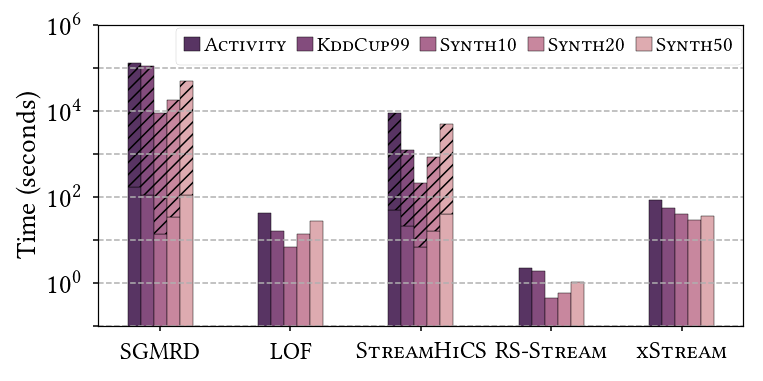

In [14]:
%matplotlib notebook

plt.rcParams['hatch.color'] = 'b'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,3.5), sharex=True, sharey="row")

approaches = ['SGMRD-mine', 'SGMRD-search', 'LOF', 'StreamHiCS-mine',
       'StreamHiCS-search', 'RS-Stream', 'xStream']
datasets =['Activity', 'KddCup99', 'Synth10', 'Synth20', 'Synth50']
barWidth = 0.1

barss = [list(data[data[0] == d][2]) for d in datasets]

rs = [np.arange(len(barss[0]))]
for x in barss[1::]:
    rs = rs + [[x + barWidth for x in rs[-1]]] 
    
cmap = sns.cubehelix_palette(7, reverse=True)

for i in range(len(barss)):
    for j in range(len(barss[i])):
        if(approaches[j] in ["LOF", 'StreamHiCS-mine', 'StreamHiCS-search']):
            index = rs[i][j] - 1
        elif(approaches[j] in ['RS-Stream', 'xStream']):
            index = rs[i][j] - 2
        else:
            index = rs[i][j]
        
        if(j == 2):
            label = r'\textsc{%s}'%datasets[i]
        else:
            label = "_nolegend_"
        if(approaches[j].endswith("-search")):
             plt.bar(index-1, barss[i][j], color=cmap[i+1], width=barWidth, edgecolor='black', label=label,
                    bottom=barss[i][j-1], hatch="///")
        elif(approaches[j].endswith("-mine")):
             plt.bar(index, barss[i][j], color=cmap[i+1], width=barWidth, edgecolor='black', label=label)
        else:
             plt.bar(index, barss[i][j], color=cmap[i+1], width=barWidth, edgecolor='black', label=label)
    
plt.xticks([r + barWidth*2 for r in range(len(barss[0]))][:-2], 
           [r'\textsc{SGMRD}', r'\textsc{LOF}', r'\textsc{StreamHiCS}', r'\textsc{RS-Stream}', r'\textsc{xStream}'],
          fontsize=16)

plt.yscale("log")
plt.ylabel("Time (seconds)", fontsize=18)
plt.legend(ncol=5, fontsize=14, columnspacing=0.50, handlelength=0.75, handletextpad=0.2, framealpha=1, loc=(0.12,0.868))
plt.yticks([0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000], ["$10^{-2}$", "", "$10^0$", "", "$10^2$", "", "$10^4$", "", "$10^6$"])
plt.ylim(0.1,1000000)

plt.grid(axis="y", linestyle="--")
plt.xticks(rotation=0)

plt.show()
plt.tight_layout()
plt.savefig('plots/Figure14.pdf', bbox_inches = "tight")